In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [29]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

C:\Users\wajit\AppData\Local\Temp\ipykernel_3092\3508010389.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


In [30]:
print(data)

        Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0    2017-01-01   04:58:14   -8.9300   110.0500            10.0        4.0   
1    2017-01-01   06:43:49   -9.2800   113.8700            10.0        3.0   
2    2017-01-01   10:27:23   -9.0400   112.8700            10.0        3.3   
3    2017-01-01   15:18:49  -10.4600   112.5400            10.0        3.4   
4    2017-01-02   21:02:24   -8.9400   108.7500            10.0        5.3   
...         ...        ...       ...        ...             ...        ...   
6144 2022-12-31   09:10:44   -8.3038   109.0606            38.0        2.8   
6145 2022-12-31   12:40:34  -10.5269   112.1858            10.0        4.3   
6146 2022-12-31   15:01:21   -8.8896   112.4811            41.0        3.1   
6147 2022-12-31   17:21:53  -10.4633   113.1895            10.0        3.8   
6148 2022-12-31   18:13:14   -8.8052   109.5594            29.0        3.0   

     Type                                         Keterangan Di

In [31]:
data.describe()

,Tanggal,Latitude,Longitude,Kedalaman (km),Magnitude
count,6149,6149.000000,6149.000000,6149.000000,6149.000000
mean,2020-12-18 02:18:38.230606592,-8.879588,111.311699,30.002895,3.142739
min,2017-01-01 00:00:00,-12.690000,108.200000,1.000000,0.900000
25%,2019-06-09 00:00:00,-9.300000,110.370000,10.000000,2.800000
50%,2021-09-08 00:00:00,-8.881300,111.070000,14.000000,3.100000
75%,2022-07-12 00:00:00,-8.430000,112.720000,29.000000,3.500000
max,2022-12-31 00:00:00,0.767800,114.000000,715.000000,6.600000
std,NaN,0.838015,1.396364,51.434214,0.670986


In [32]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%H:%M:%S')
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [33]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5', monitor='val_mae', verbose=1, save_best_only=True)

In [34]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [35]:
gempa_semua = np.array(gempa_semua)

In [36]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -9.28   113.87    10.    ]
 [ -9.04   112.87    10.    ]
 ...
 [ -8.8896 112.4811  41.    ]
 [-10.4633 113.1895  10.    ]
 [ -8.8052 109.5594  29.    ]]


In [37]:
magnitude = magnitude.astype('float64')

In [38]:
magnitude.dtype

dtype('float64')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.3, random_state=42)

In [40]:
X_valid, X_training, y_valid, y_training = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 48)                6192      
                                                      

In [42]:
optimizer = Adam(learning_rate=0.001)

In [43]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [44]:
history = model.fit(X_training, y_training, batch_size=64, epochs=3000, verbose=1, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/3000


 1/14 [=>............................] - ETA: 8s - loss: 15.5796 - mae: 3.8626
Epoch 1: val_mae improved from inf to 3.21030, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
14/14 [==============================] - 1s 19ms/step - loss: 13.1807 - mae: 3.5393 - val_loss: 10.7478 - val_mae: 3.2103
Epoch 2/3000
 1/14 [=>............................] - ETA: 0s - loss: 11.7242 - mae: 3.3404
Epoch 2: val_mae improved from 3.21030 to 2.91792, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
14/14 [==============================] - 0s 11ms/step - loss: 10.5810 - mae: 3.1723 - val_loss: 8.9548 - val_mae: 2.9179
Epoch 3/3000
 1/14 [=>............................] - ETA: 0s - loss: 9.4041 - mae: 2.9810
Epoch 3: val_mae improved from 2.91792 to 2.78385, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
14/14 [==============================] - 0s 9ms/step - loss: 9.0895 - mae: 2.9326 - val_loss: 8.2

In [45]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5")
error = model.evaluate(X_valid, y_valid)[1]
error_percentage = error * 100
print("Loss: ", error_percentage)

108/108 [==============================] - 0s 817us/step - loss: 0.2624 - mae: 0.3668
Loss:  36.67918145656586


data X_test yang harus dimasukkan dibagian input user

latitude_subset = latitude[:100]
longitude_subset = longitude[:100]
kedalaman_subset = kedalaman[:100]

In [46]:
count = 0  # Variable to count the number of predicted data
predictions = np.array([])  # Array to store the predicted values

for test in X_test:
    koordinat_latitude = float(test[0])
    koordinat_longitude = float(test[1])
    kedalaman_gempa = float(test[2])

    input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
    hasil_prediksi = model.predict(input_data)

    # Concatenate the predicted value to the predictions array
    predictions = np.concatenate([predictions, hasil_prediksi.flatten()])

    # Increase the count by 1
    count += 1

    # Print the prediction
    print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

    if count == 100:
        break

print("Banyaknya data yang diprediksi:", count)


1/1 [==============================] - 0s 98ms/step
Perkiraan kekuatan gempa [[3.0738792]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[2.9412856]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[2.6456618]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[3.1114855]] Mg
1/1 [==============================] - 0s 16ms/step
Perkiraan kekuatan gempa [[3.1307762]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[2.980898]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[3.0713708]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[3.5911427]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[2.6456525]] Mg
1/1 [==============================] - 0s 20ms/step
Perkiraan kekuatan gempa [[3.1941059]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan

count = 0  # Variable to count the number of predicted data
predictions = []  # List to store the predicted values

for i in range(len(latitude_subset)):
    for j in range(len(longitude_subset)):
        for k in range(len(kedalaman_subset)):
            koordinat_latitude = float(latitude_subset[i])
            koordinat_longitude = float(longitude_subset[j])
            kedalaman_gempa = float(kedalaman_subset[k])

            input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
            hasil_prediksi = model.predict(input_data)

            # Append the predicted value to the list
            predictions.append(hasil_prediksi)

            # Increase the count by 1
            count += 1

            # Print the prediction
            print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

            if count == 100:
                break
        else:
            continue
        break
    else:
        continue
    break

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)

print("Banyaknya data yang diprediksi:", count)


In [47]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [48]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {} Mg".format(prediksi_gempa))

In [49]:
print(predictions)

[3.07387924 2.94128561 2.64566183 3.11148548 3.13077617 2.9808979
 3.07137084 3.59114265 2.64565253 3.19410586 3.61082792 3.07657337
 3.05340624 3.09455681 2.95400381 3.33690715 2.94811058 3.61214352
 2.89934945 2.53723598 3.08781576 3.08834386 3.03926373 3.2274754
 3.55518651 2.95651078 3.28194094 2.51582408 3.22813606 3.04816604
 3.23686075 2.98843145 3.08326197 3.2312963  3.07829189 3.14300537
 2.03226686 3.24079847 1.94515896 3.08999252 3.17339087 3.14676785
 3.05478287 3.05572176 3.30142355 3.23461771 2.54859281 2.97538304
 3.41607285 3.32933569 2.97356749 3.59951591 2.87999368 3.19357848
 2.98947859 3.03389454 3.06085563 3.04718876 3.0372541  3.59701967
 3.48694301 3.09103632 2.99218726 3.07667589 4.33505535 3.10964751
 3.02046967 3.30251789 3.12815738 2.97609282 2.95451427 3.2096684
 3.3114326  3.03441429 3.07292724 3.03333473 2.99512291 3.04574919
 3.21147394 3.10733032 3.25338316 2.96955609 2.95999622 2.22802281
 2.27175522 3.03517008 3.04573989 2.22476196 2.3277328  3.2391183

In [50]:
flattened_array = predictions

In [51]:
magnitude_subset = magnitude[:100]

In [52]:
x = data['Tanggal'][:100]
y_data_asli = magnitude_subset
y_data_forecasted = flattened_array

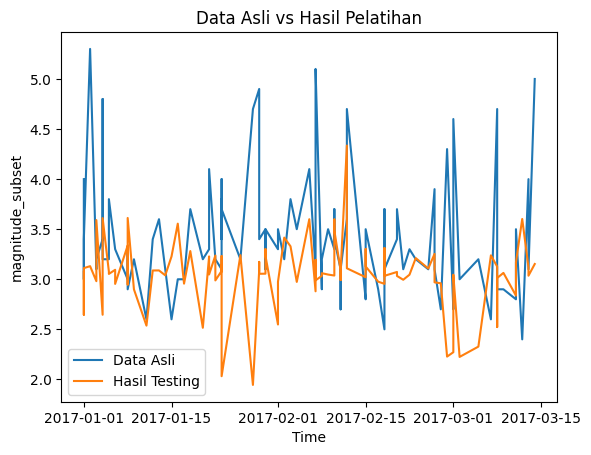

In [53]:
plt.plot(x, y_data_asli, label='Data Asli')
plt.plot(x, y_data_forecasted, label='Hasil Testing')
plt.xlabel('Time')
plt.ylabel('magnitude_subset')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

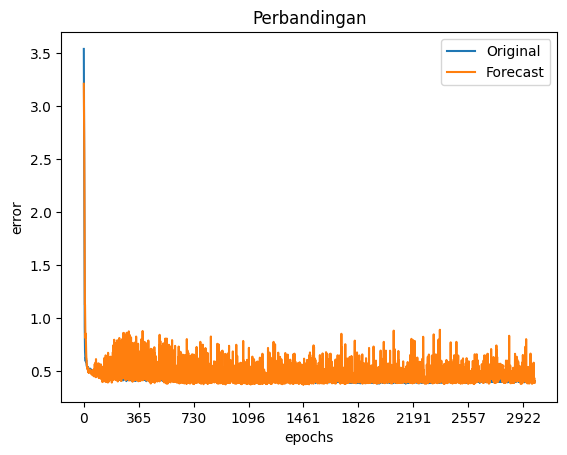

In [54]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Perbandingan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(['Original', 'Forecast'], loc='upper right')
plt.show()